In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE= 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
n_classes = len(class_names)
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(dataset)

501

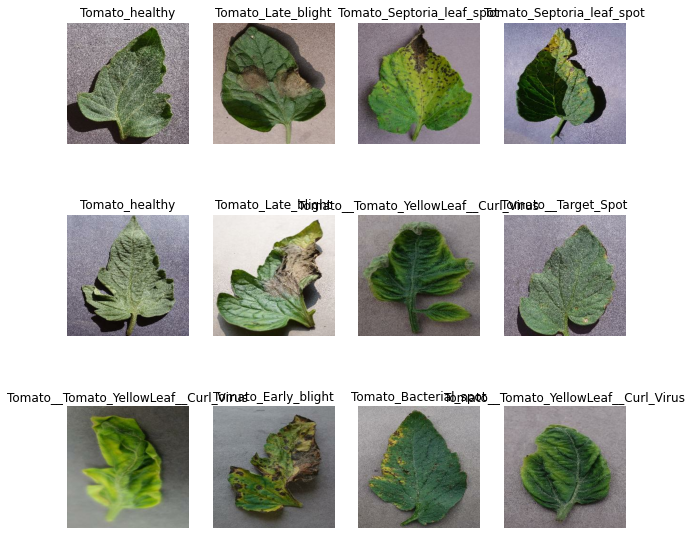

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
train_size = 0.8
len(dataset)*train_size

400.8

In [8]:
train_ds=dataset.take(54)
len(train_ds)

54

In [9]:
test_ds = dataset.skip(54)
len(test_ds)

447

In [10]:
val_size =  0.1
len(dataset)*val_size

50.1

In [11]:
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [12]:
len(test_ds)

441

In [13]:
def get_dataset_partition_tf(ds , train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds =get_dataset_partition_tf(dataset)

In [15]:
len(train_ds)

400

In [16]:
len(val_ds)

50

In [17]:
len(test_ds)

51

In [18]:
len(val_ds)

50

In [19]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation  = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
image_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3) , activation= 'relu', input_shape = image_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3) , activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])
model.build(input_shape=image_shape)


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [24]:
model.compile(
    optimizer= 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [25]:
history=model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size =BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
)

Epoch 1/50
400/400 [==============================] - 570s 1s/step - loss: 1.7356 - accuracy: 0.3803 - val_loss: 1.2624 - val_accuracy: 0.5556
Epoch 2/50
400/400 [==============================] - 548s 1s/step - loss: 1.0746 - accuracy: 0.6288 - val_loss: 0.8177 - val_accuracy: 0.7194
Epoch 3/50
400/400 [==============================] - 525s 1s/step - loss: 0.7184 - accuracy: 0.7487 - val_loss: 0.7645 - val_accuracy: 0.7437
Epoch 4/50
400/400 [==============================] - 525s 1s/step - loss: 0.5527 - accuracy: 0.8073 - val_loss: 0.5994 - val_accuracy: 0.7856
Epoch 5/50
400/400 [==============================] - 529s 1s/step - loss: 0.4392 - accuracy: 0.8493 - val_loss: 0.5470 - val_accuracy: 0.8131
Epoch 6/50
400/400 [==============================] - 523s 1s/step - loss: 0.3826 - accuracy: 0.8643 - val_loss: 0.3414 - val_accuracy: 0.8744
Epoch 7/50
400/400 [==============================] - 521s 1s/step - loss: 0.3372 - accuracy: 0.8831 - val_loss: 0.3140 - val_accuracy: 0.8906

In [26]:
scores = model.evaluate(test_ds)

51/51 [==============================] - 13s 248ms/step - loss: 0.1323 - accuracy: 0.9553


In [27]:
scores

[0.1322602927684784, 0.9552696347236633]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 400}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
len(history.history['accuracy'])

50

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation Loss')

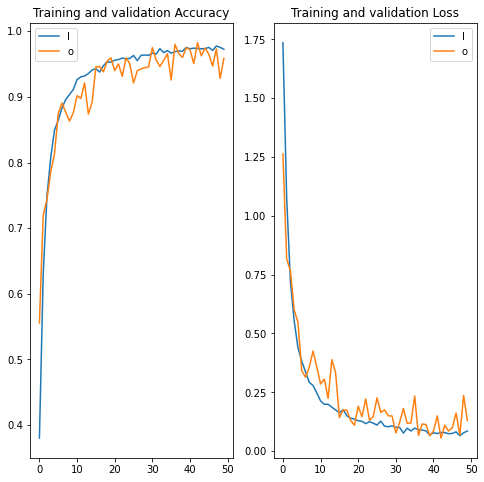

In [33]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuuracy")
plt.plot(range(EPOCHS),val_acc, label ='vaidadion accuracy')
plt.legend('lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label ='vaidadion Loss')
plt.legend('lower right')
plt.title('Training and validation Loss')

first image to predict
first image actual label: Tomato_Bacterial_spot
pridicted label: Tomato_Bacterial_spot


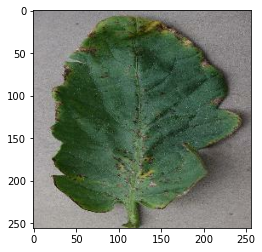

In [34]:
for image_batch, label_batch in test_ds.take(1):
    first_image = (image_batch[0].numpy().astype('uint8'))
    first_label = label_batch[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print('first image actual label:',class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print('pridicted label:',class_names[np.argmax(batch_prediction[0])])

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)# create a batch
    
    predictions = model.predict(img_array)
    
    prediction_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return prediction_class, confidence

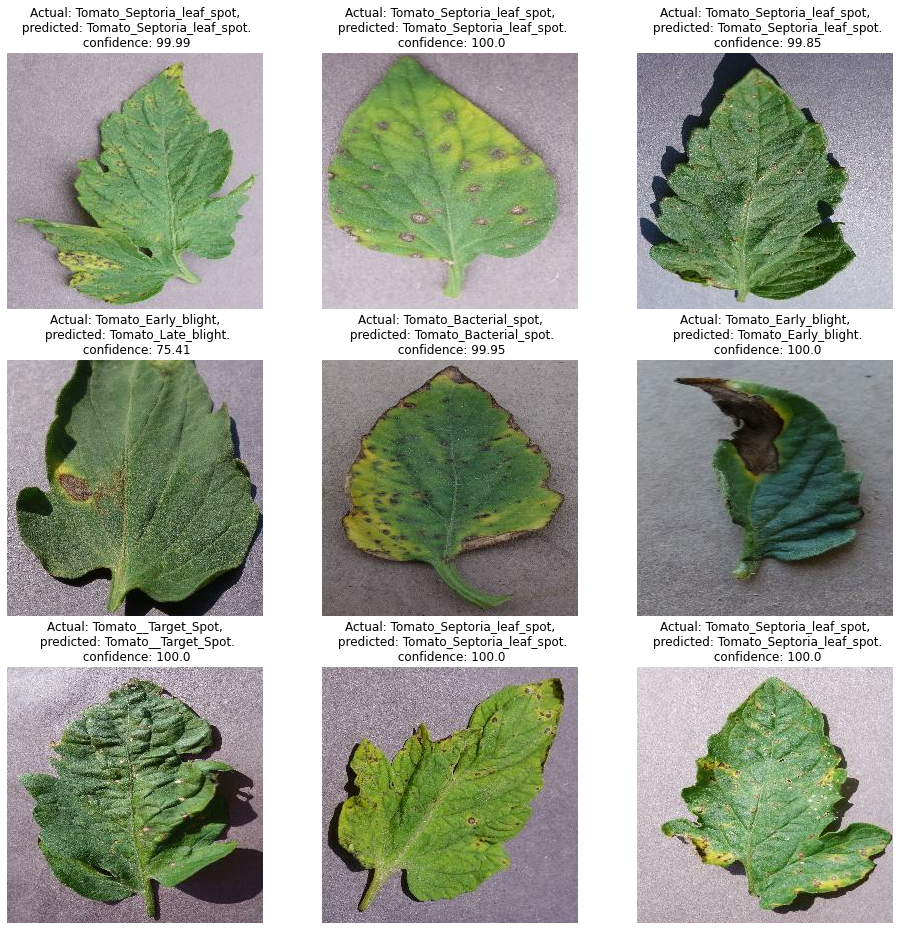

In [39]:
plt.figure(figsize=(16,16))
for images ,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_calss, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'Actual: {actual_class},\n predicted: {predicted_calss}.\n confidence: {confidence}')
        plt.axis('off')

In [37]:
import os
model_version = max([int(i) for i in os.listdir('models')+[0]])+1
model.save(f'models/{model_version}')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/3\assets


In [45]:
def savemodel(name):
    # serialize model to JSON
    model_json = model.to_json()
    with open(''+name + '.json', "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(name + '.h5')
    print("Saved model to disk")

In [47]:
savemodel('tomato')

FileNotFoundError: [Errno 2] No such file or directory: 'model/tomato.json'